### Эксперимент 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
N_train = 50        
N_test = 1000       
sigma = 0.1         
M = 50         # Число итераций для вычисления мат. ожидания
np.random.seed(0)

In [4]:
def f_star(x):
    x = x.ravel()
    return np.exp(-x**2) + 1.5*np.exp(-(x - 2)**2)

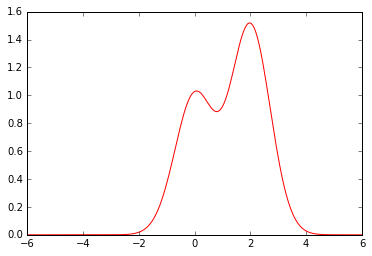

In [5]:
xx = np.linspace(-6, 6, 200)
yy = f_star(xx)
plt.plot(xx, yy, 'r')

In [6]:
def generate(N, sigma, M = 1):
    x = 10*np.random.rand(N) - 5
    x = np.sort(x)

    if M == 1:
        y = f_star(x) + sigma*np.random.randn(N)
    else:
        y = np.zeros((N, M))
        for i in range(M):
            y[:, i] = f_star(x) + sigma*np.random.randn(N)

    x = x.reshape((N, 1))

    return x, y

In [7]:
x_train = []
y_train = []

for i in range(M):
    x, y = generate(N = N_train, sigma = sigma)
    x_train.append(x)
    y_train.append(y)

x_test, y_test = generate(N = N_test, sigma = sigma, M = M)

## Дерево решений

In [8]:
model = DecisionTreeRegressor() 

In [9]:
y_predict = np.zeros((N_test, M))

for i in range(M):
    model.fit(x_train[i], y_train[i])
    y_predict[:, i] = model.predict(x_test)

In [10]:
y_error = np.zeros(N_test)

for i in range(M):
    for j in range(M):
        y_error += (y_test[:, j] - y_predict[:, i])**2

y_error /= M**2

y_sigma = np.var(y_test, axis = 1)
y_bias = (f_star(x_test) - np.mean(y_predict, axis = 1))**2
y_var = np.var(y_predict, axis = 1)

print '%7.4f (error) = %7.4f (sigma) + %7.4f (bias^2) + %7.4f (var)' % \
      (np.mean(y_error), np.mean(y_sigma), np.mean(y_bias), np.mean(y_var))

 0.0255 (error) =  0.0098 (sigma) +  0.0003 (bias^2) +  0.0152 (var)


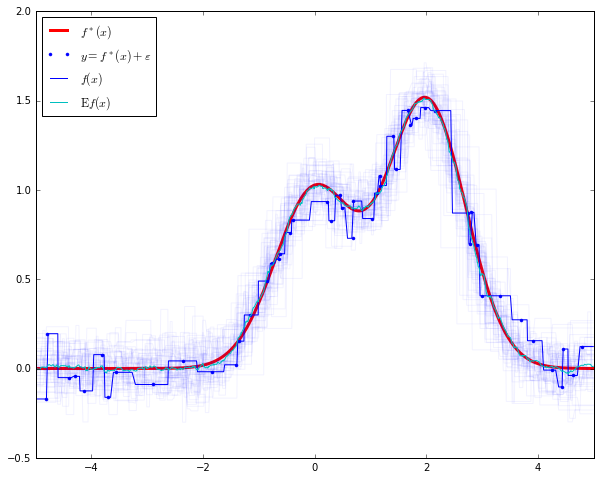

In [11]:
plt.figure(figsize = (10,8))
plt.plot(x_test,     f_star(x_test), 'r',   label = r'$f^*(x)$', linewidth = 3)
plt.plot(x_train[0], y_train[0], '.b', label = r'$y = f^*(x)+\varepsilon$')

for i in range(M):
    if i == 0:
        plt.plot(x_test, y_predict[:, i], 'b', label = r'$f(x)$')
    else:
        plt.plot(x_test, y_predict[:, i], 'b', alpha = 0.05)

plt.plot(x_test, np.mean(y_predict, axis=1), 'c', label = r'${\rm E} f(x)$')
plt.xlim([-5, 5])
plt.legend(loc='upper left')

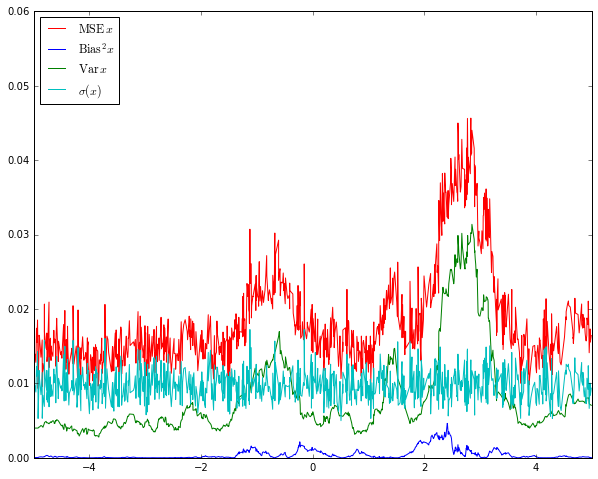

In [19]:
plt.figure(figsize = (10,8))
plt.plot(x_test, y_error, "r", label = r"${\rm MSE}\, x$")
plt.plot(x_test, y_bias,  "b", label = r"${\rm Bias}^2 x$"),
plt.plot(x_test, y_var,   "g", label = r"${\rm Var}\, x$"),
plt.plot(x_test, y_sigma, "c", label = r"$\sigma(x)$")

plt.xlim([-5, 5])
plt.ylim([0, 0.06])

plt.legend(loc="upper left")

## Random Forest

In [13]:
model = RandomForestRegressor(n_estimators = 100) 
    # try BaggingRegressor(DecisionTreeRegressor())

In [14]:
y_predict = np.zeros((N_test, M))

for i in range(M):
    model.fit(x_train[i], y_train[i])
    y_predict[:, i] = model.predict(x_test)

In [15]:
y_error = np.zeros(N_test)

for i in range(M):
    for j in range(M):
        y_error += (y_test[:, j] - y_predict[:, i])**2

y_error /= M**2

y_sigma = np.var(y_test, axis = 1)
y_bias = (f_star(x_test) - np.mean(y_predict, axis = 1))**2
y_var = np.var(y_predict, axis = 1)

print '%7.4f (error) = %7.4f (sigma) + %7.4f (bias^2) + %7.4f (var)' % \
      (np.mean(y_error), np.mean(y_sigma), np.mean(y_bias), np.mean(y_var))

 0.0186 (error) =  0.0098 (sigma) +  0.0004 (bias^2) +  0.0082 (var)


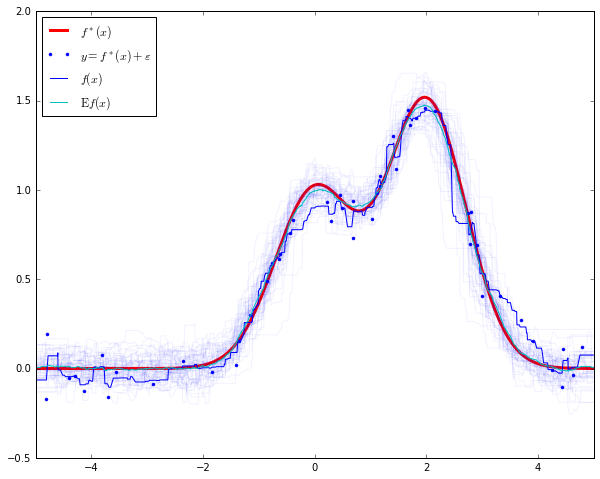

In [16]:
plt.figure(figsize = (10,8))
plt.plot(x_test,     f_star(x_test), 'r',   label = r'$f^*(x)$', linewidth = 3)
plt.plot(x_train[0], y_train[0], '.b', label = r'$y = f^*(x)+\varepsilon$')

for i in range(M):
    if i == 0:
        plt.plot(x_test, y_predict[:, i], 'b', label = r'$f(x)$')
    else:
        plt.plot(x_test, y_predict[:, i], 'b', alpha = 0.05)

plt.plot(x_test, np.mean(y_predict, axis=1), 'c', label = r'${\rm E} f(x)$')
plt.xlim([-5, 5])
plt.legend(loc='upper left')

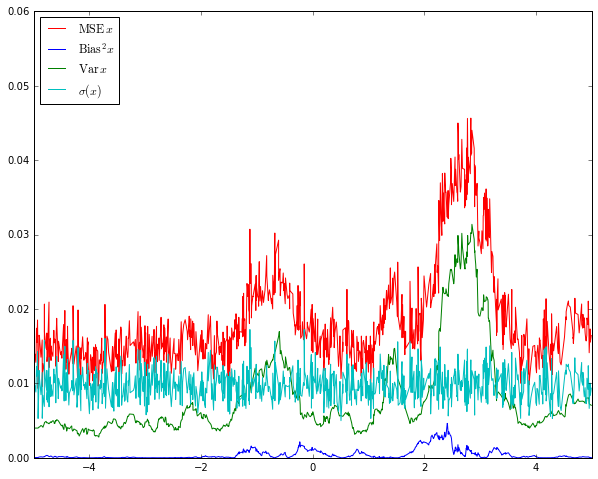

In [20]:
plt.figure(figsize = (10,8))
plt.plot(x_test, y_error, "r", label = r"${\rm MSE}\, x$")
plt.plot(x_test, y_bias,  "b", label = r"${\rm Bias}^2 x$"),
plt.plot(x_test, y_var,   "g", label = r"${\rm Var}\, x$"),
plt.plot(x_test, y_sigma, "c", label = r"$\sigma(x)$")

plt.xlim([-5, 5])
plt.ylim([0, 0.06])

plt.legend(loc="upper left")